In [ ]:
!pip3 install -U scikit-learn

#data conversion

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn

In [ ]:
import pandas as pd

df = pd.read_csv('Q1TrainData.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.columns[df.isnull().any()]

Index([], dtype='object')

In [ ]:
df_original = df
df.head()

,date,yield,species,region,size_range,dump_size,cooking_time,post_cook_temp
551,2018-01-01,0.416864,Albacore,Atlantic ocean,<1,1912.299613,1.706988,64.243250
1467,2018-01-01,0.676597,Yellowfin,Indian ocean,1-3,1888.798276,2.609832,67.232657
1210,2018-01-01,0.545764,Albacore,Indian ocean,4-5,2225.560780,1.986863,62.860545
1297,2018-01-02,0.506087,Albacore,Pacific ocean,<1,1880.798754,1.824694,63.798554
413,2018-01-02,0.538991,Albacore,Atlantic ocean,4-5,1835.768245,1.773692,64.602647


In [ ]:
df['species'].unique()

species_binary_labels = {
    'Albacore' : 0,
    'Yellowfin' : 1
}

df['species'] = df.species.map(species_binary_labels)
df.head()

,date,yield,species,region,size_range,dump_size,cooking_time,post_cook_temp
551,2018-01-01,0.416864,0,Atlantic ocean,<1,1912.299613,1.706988,64.243250
1467,2018-01-01,0.676597,1,Indian ocean,1-3,1888.798276,2.609832,67.232657
1210,2018-01-01,0.545764,0,Indian ocean,4-5,2225.560780,1.986863,62.860545
1297,2018-01-02,0.506087,0,Pacific ocean,<1,1880.798754,1.824694,63.798554
413,2018-01-02,0.538991,0,Atlantic ocean,4-5,1835.768245,1.773692,64.602647


In [ ]:
size_range_order = {
      '<1' : 1,
      '1-3' : 2,
      '3-4': 3,
      '4-5': 4,
      '5-6': 5,
      '>6' : 6
  }
df['size_range'] = df.size_range.map(size_range_order)
df.head()

,date,yield,species,region,size_range,dump_size,cooking_time,post_cook_temp
551,2018-01-01,0.416864,0,Atlantic ocean,1,1912.299613,1.706988,64.243250
1467,2018-01-01,0.676597,1,Indian ocean,2,1888.798276,2.609832,67.232657
1210,2018-01-01,0.545764,0,Indian ocean,4,2225.560780,1.986863,62.860545
1297,2018-01-02,0.506087,0,Pacific ocean,1,1880.798754,1.824694,63.798554
413,2018-01-02,0.538991,0,Atlantic ocean,4,1835.768245,1.773692,64.602647


In [ ]:
df['region'].unique()

array(['Atlantic ocean', 'Indian ocean', 'Pacific ocean'], dtype=object)

In [ ]:
region_mask = pd.get_dummies(df['region'], prefix='region')
# df = df.drop(col,axis = 1)
df = df.join(region_mask)
df.head()

,date,yield,species,region,size_range,dump_size,cooking_time,post_cook_temp,region_Atlantic ocean,region_Indian ocean,region_Pacific ocean
551,2018-01-01,0.416864,0,Atlantic ocean,1,1912.299613,1.706988,64.243250,1,0,0
1467,2018-01-01,0.676597,1,Indian ocean,2,1888.798276,2.609832,67.232657,0,1,0
1210,2018-01-01,0.545764,0,Indian ocean,4,2225.560780,1.986863,62.860545,0,1,0
1297,2018-01-02,0.506087,0,Pacific ocean,1,1880.798754,1.824694,63.798554,0,0,1
413,2018-01-02,0.538991,0,Atlantic ocean,4,1835.768245,1.773692,64.602647,1,0,0


#frequency distribution

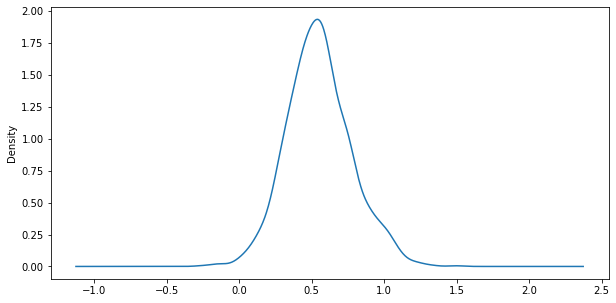

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
df['yield'].plot.kde()

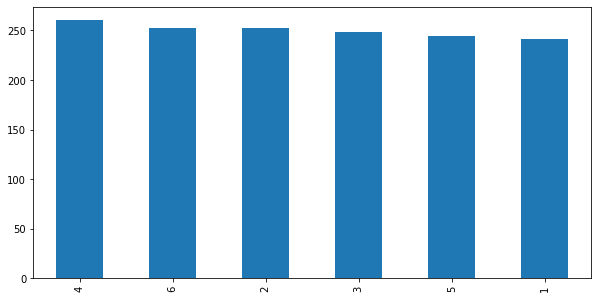

In [ ]:
df['size_range'].value_counts().plot(kind='bar')

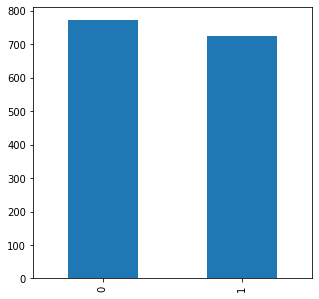

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
df['species'].value_counts().plot(kind='bar')

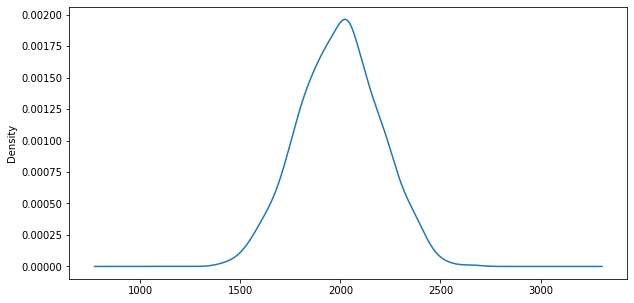

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
df['dump_size'].plot.kde()

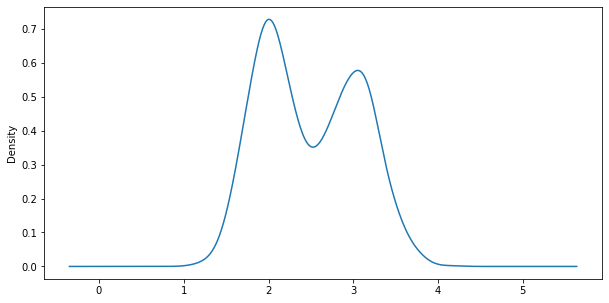

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
df['cooking_time'].plot.kde()

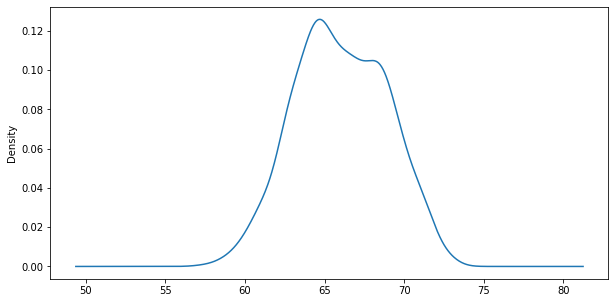

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
df['post_cook_temp'].plot.kde()

#heatmap

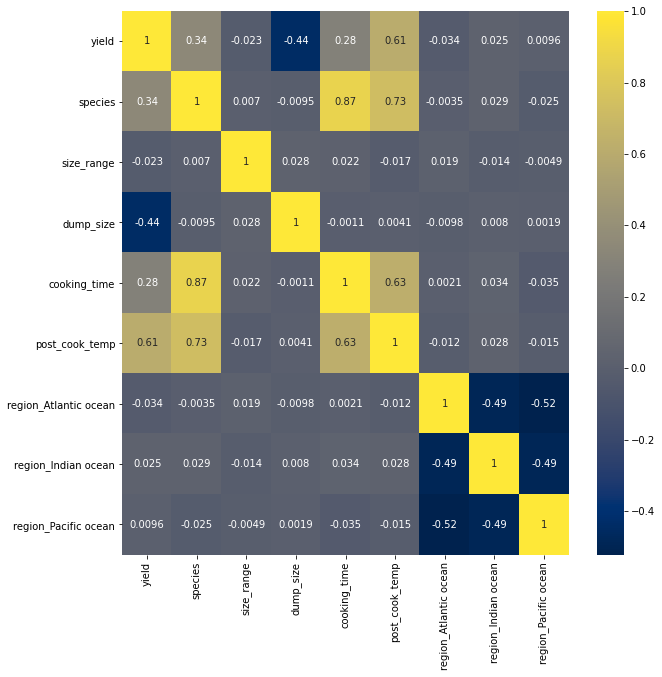

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.rcParams["figure.figsize"] = (10,10)

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True, cmap='cividis')
plt.show()

#histogram

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


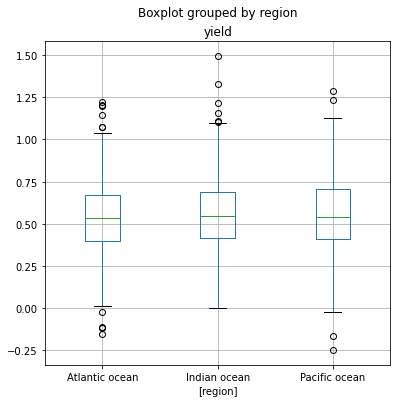

In [ ]:
plt.rcParams["figure.figsize"] = (6, 6)
df.boxplot(column=['yield'], by=['region'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


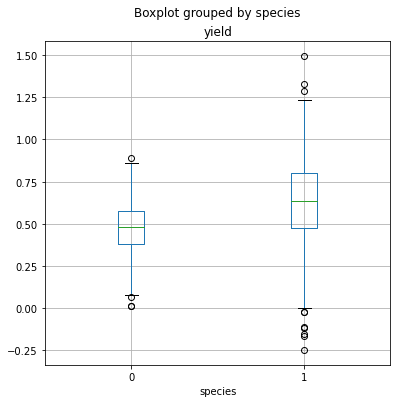

In [ ]:
plt.rcParams["figure.figsize"] = (6, 6)
df.boxplot(column=['yield'], by='species')

#season and day based histogram

In [ ]:
df_seasons = df
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.head()

,date,yield,species,region,size_range,dump_size,cooking_time,post_cook_temp,region_Atlantic ocean,region_Indian ocean,region_Pacific ocean,year,month,day
551,2018-01-01,0.416864,0,Atlantic ocean,1,1912.299613,1.706988,64.243250,1,0,0,2018,1,1
1467,2018-01-01,0.676597,1,Indian ocean,2,1888.798276,2.609832,67.232657,0,1,0,2018,1,1
1210,2018-01-01,0.545764,0,Indian ocean,4,2225.560780,1.986863,62.860545,0,1,0,2018,1,1
1297,2018-01-02,0.506087,0,Pacific ocean,1,1880.798754,1.824694,63.798554,0,0,1,2018,1,2
413,2018-01-02,0.538991,0,Atlantic ocean,4,1835.768245,1.773692,64.602647,1,0,0,2018,1,2


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


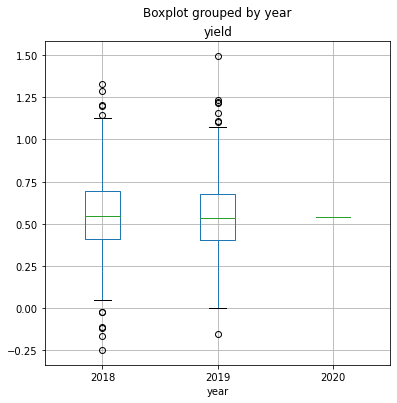

In [ ]:
plt.rcParams["figure.figsize"] = (6, 6)
df.boxplot(column=['yield'], by='year')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


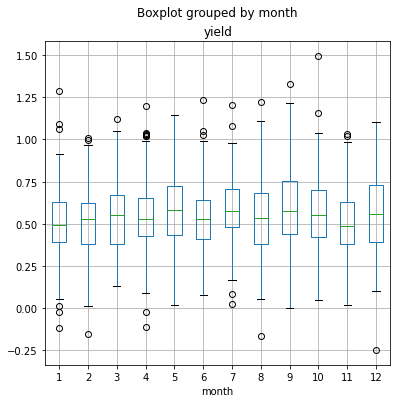

In [ ]:
plt.rcParams["figure.figsize"] = (6, 6)
df.boxplot(column=['yield'], by='month')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


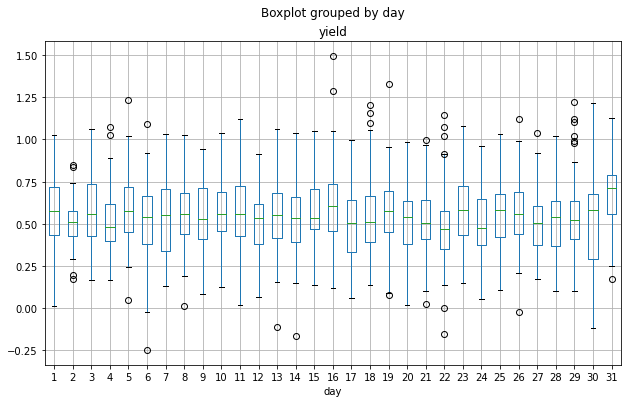

In [ ]:
plt.rcParams["figure.figsize"] = (10, 6)
df.boxplot(column=['yield'], by='day')

#variance

In [ ]:
df.head()

,date,yield,species,region,size_range,dump_size,cooking_time,post_cook_temp,region_Atlantic ocean,region_Indian ocean,region_Pacific ocean,year,month,day
551,2018-01-01,0.416864,0,Atlantic ocean,1,1912.299613,1.706988,64.243250,1,0,0,2018,1,1
1467,2018-01-01,0.676597,1,Indian ocean,2,1888.798276,2.609832,67.232657,0,1,0,2018,1,1
1210,2018-01-01,0.545764,0,Indian ocean,4,2225.560780,1.986863,62.860545,0,1,0,2018,1,1
1297,2018-01-02,0.506087,0,Pacific ocean,1,1880.798754,1.824694,63.798554,0,0,1,2018,1,2
413,2018-01-02,0.538991,0,Atlantic ocean,4,1835.768245,1.773692,64.602647,1,0,0,2018,1,2


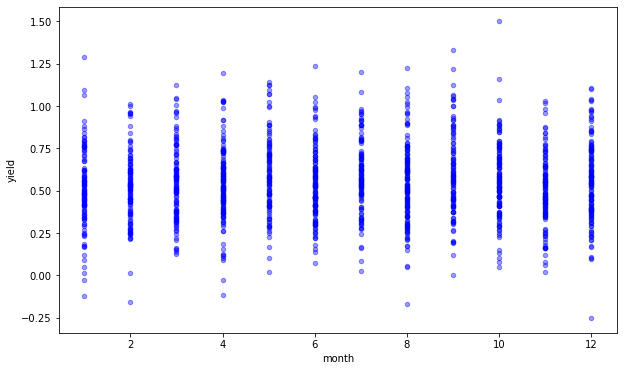

In [ ]:
df.plot.scatter(x='month', y='yield', alpha=0.4, c = 'blue')

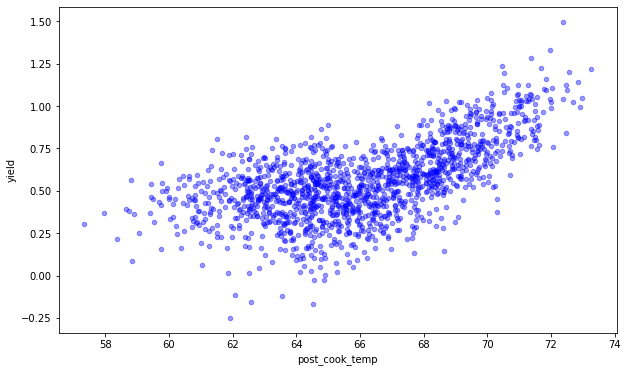

In [ ]:
df.plot.scatter(x='post_cook_temp', y='yield', alpha=0.4, c = 'blue')

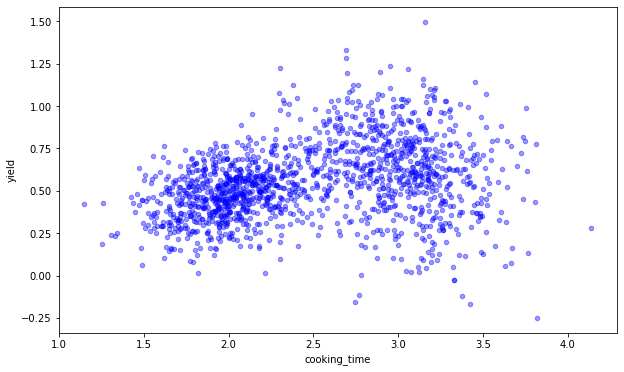

In [ ]:
df.plot.scatter(x='cooking_time', y='yield', alpha=0.4, c = 'blue')

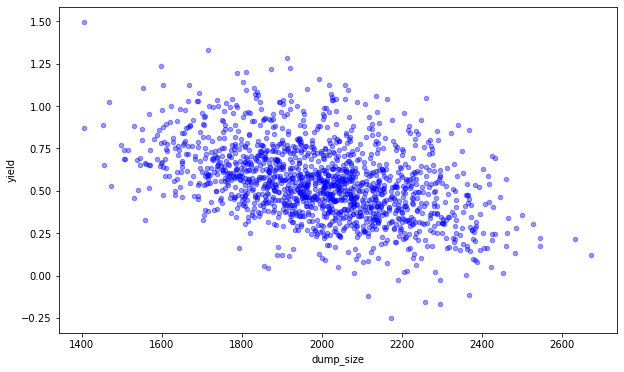

In [ ]:
df.plot.scatter(x='dump_size', y='yield', alpha=0.4, c = 'blue')

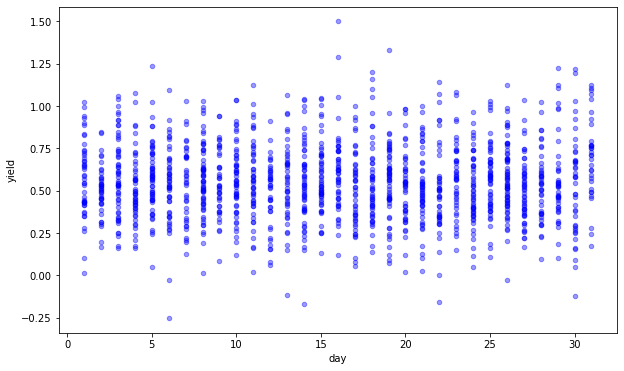

In [ ]:
df.plot.scatter(x='day', y='yield', alpha=0.4, c = 'blue')

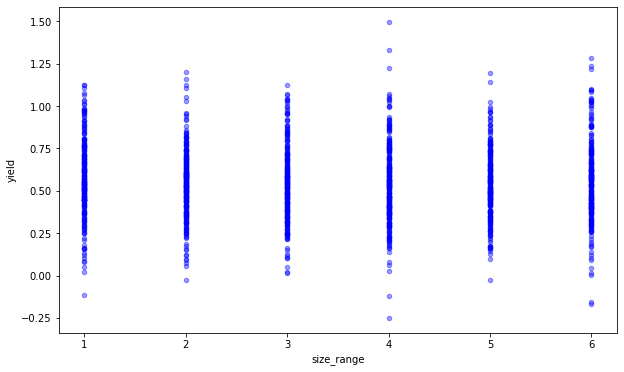

In [ ]:
df.plot.scatter(x='size_range', y='yield', alpha=0.4, c = 'blue')

# seasonality

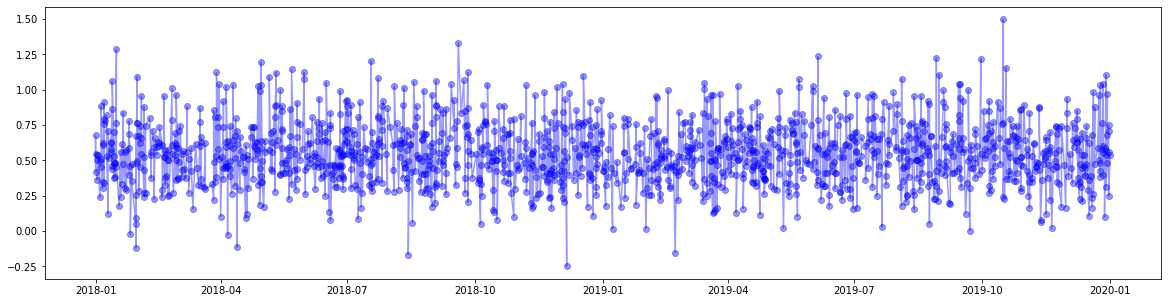

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.rcParams["figure.figsize"] = (20,5)

plt.plot_date(df['date'], df[['yield']], linestyle='-', alpha=0.4, c = 'blue')

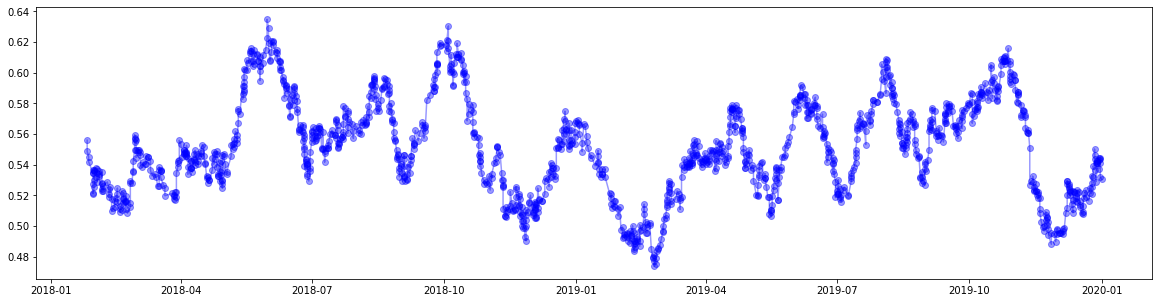

In [ ]:
df['sma'] = df['yield'].rolling(window=60).mean()
plt.plot_date(df['date'], df[['sma' ]], linestyle='solid', alpha=0.4, c = 'blue')

#Model

In [ ]:
model_df = df[['yield', 'post_cook_temp', 'species', 'cooking_time']]
model_df.head()

,yield,post_cook_temp,species,cooking_time
551,0.416864,64.243250,0,1.706988
1467,0.676597,67.232657,1,2.609832
1210,0.545764,62.860545,0,1.986863
1297,0.506087,63.798554,0,1.824694
413,0.538991,64.602647,0,1.773692


In [ ]:
# k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

# load data
dataset = model_df

# split data into X and y
X = dataset[['post_cook_temp', 'species', 'cooking_time']]
Y = dataset['yield']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

model = RandomForestRegressor(n_estimators=1000)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict( X_test )
# y_pred

In [ ]:
# y_test.values

# visually comparing test and predicted yields

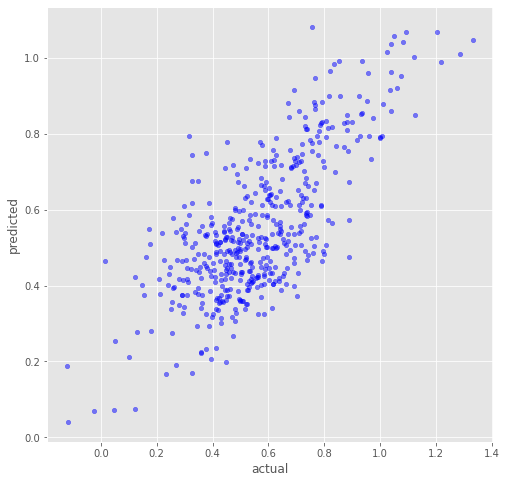

In [ ]:
visual_data = {
    'actual': y_test.values,
    'predicted': y_pred
}

df_visual = pd.DataFrame(visual_data)

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8, 8)
df_visual.plot.scatter(x = 'actual', y = 'predicted', alpha=0.5, c='blue')

In [ ]:
df_visual.corr()

,actual,predicted
actual,1.000000,0.740734
predicted,0.740734,1.000000


In [ ]:
from sklearn.metrics import explained_variance_score

# model scoring metric
explained_variance_score( y_test, y_pred )

0.534474588146735

In [ ]:
from sklearn.metrics import max_error
max_error(y_test, y_pred)

0.47805242566662126

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.021352188715501746

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test, y_pred)

0.021352188715501746

In [ ]:
df_new = pd.read_csv('Q1TestData.csv')
df_new = df_new[['species', 'post_cook_temp', 'cooking_time']]
df_new

,species,post_cook_temp,cooking_time
0,Yellowfin,71.566716,2.994111
1,Yellowfin,70.159821,3.039406
2,Yellowfin,61.035458,2.627671
3,Albacore,67.775718,1.433739
4,Yellowfin,71.446987,3.247822
...,...,...,...
495,Yellowfin,70.522150,3.040452
496,Albacore,63.705742,1.644853
497,Albacore,61.750126,1.789773
498,Yellowfin,67.207049,2.785033


In [ ]:
species_binary_labels = {
    'Albacore' : 0,
    'Yellowfin' : 1
}

df_new['species'] = df_new.species.map(species_binary_labels)
df_new.head()

,species,post_cook_temp,cooking_time
0,1,71.566716,2.994111
1,1,70.159821,3.039406
2,1,61.035458,2.627671
3,0,67.775718,1.433739
4,1,71.446987,3.247822


In [ ]:
predict_new = model.predict(df_new)
predict_new

# feature generation

In [ ]:
model_df = df[['yield', 'post_cook_temp', 'species', 'cooking_time']]
model_df.head()

,yield,post_cook_temp,species,cooking_time
551,0.416864,64.243250,0,1.706988
1467,0.676597,67.232657,1,2.609832
1210,0.545764,62.860545,0,1.986863
1297,0.506087,63.798554,0,1.824694
413,0.538991,64.602647,0,1.773692


In [ ]:
modeldf_v2 = model_df
modeldf_v2['cross'] = modeldf_v2['post_cook_temp'] * modeldf_v2['cooking_time']
modeldf_v2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,yield,post_cook_temp,species,cooking_time,cross
551,0.416864,64.243250,0,1.706988,109.662454
1467,0.676597,67.232657,1,2.609832,175.465930
1210,0.545764,62.860545,0,1.986863,124.895274
1297,0.506087,63.798554,0,1.824694,116.412810
413,0.538991,64.602647,0,1.773692,114.585168


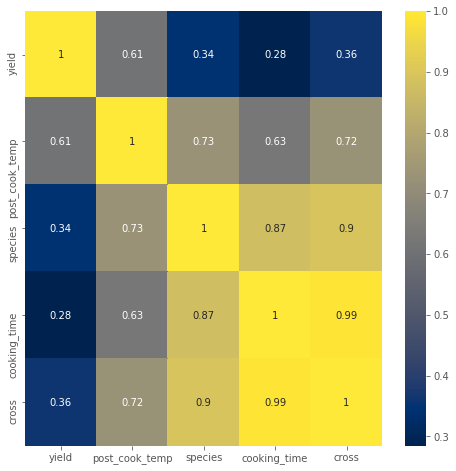

In [ ]:
corrMatrix = modeldf_v2.corr()
sn.heatmap(corrMatrix, annot=True, cmap='cividis')
plt.show()

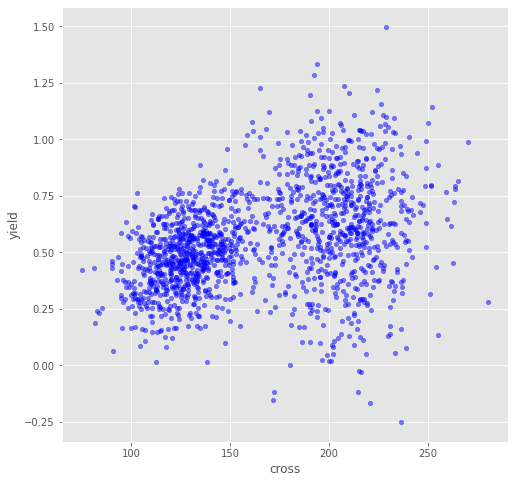

In [ ]:
modeldf_v2.plot.scatter(x = 'cross', y = 'yield', alpha = 0.5, c = 'blue')

In [ ]:
# k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

# load data
dataset = modeldf_v2

# split data into X and y
X = dataset[['post_cook_temp', 'species', 'cooking_time', 'cross']]
Y = dataset['yield']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

model2 = RandomForestRegressor(n_estimators=1000)

model2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = model2.predict( X_test )

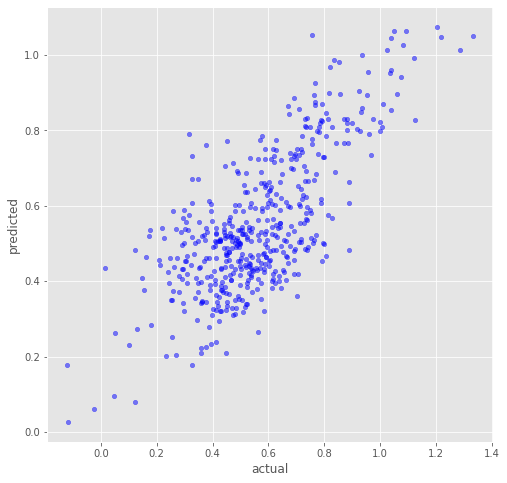

In [ ]:
visual_data = {
    'actual': y_test.values,
    'predicted': y_pred
}

df_visual = pd.DataFrame(visual_data)

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8, 8)
df_visual.plot.scatter(x = 'actual', y = 'predicted', alpha=0.5, c='blue')

In [ ]:
df_visual.corr()

,actual,predicted
actual,1.00000,0.73732
predicted,0.73732,1.00000


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.021634899350085435